# Aprendizaje por Refuerzos
### Resolución Notebook #1

**Integrantes:** Luis Alejandro Guedez Gomez (luis.guedez@dicsys.com) - María Laura Mantovani (mantovanimlaura@gmail.com)

Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

FaMAF, 2022

In [1]:
#@title Código básico de graficación (no modificar)

import numpy as np
import matplotlib.pyplot as plt
import itertools
import gym

def plot_reward_per_episode(reward_ep):

    episode_rewards = np.array(reward_ep)

    # se suaviza la curva de convergencia
    episode_number = np.linspace(1, len(episode_rewards) + 1, len(episode_rewards) + 1)
    acumulated_rewards = np.cumsum(episode_rewards)

    reward_per_episode = [acumulated_rewards[i] / episode_number[i] for i in range(len(acumulated_rewards))]

    plt.plot(reward_per_episode)
    plt.title('Recompensa acumulada por episodio')
    plt.show()
    
    
def plot_steps_per_episode(timesteps_ep):
    # se muestra la curva de aprendizaje de los pasos por episodio
    episode_steps = np.array(timesteps_ep)
    plt.plot(np.array(range(0, len(episode_steps))), episode_steps)
    plt.title('Pasos (timesteps) por episodio')
    plt.show()
    
    
def plot_steps_per_episode_smooth(timesteps_ep):
    episode_steps = np.array(timesteps_ep)

    # se suaviza la curva de aprendizaje
    episode_number = np.linspace(1, len(episode_steps) + 1, len(episode_steps) + 1)
    acumulated_steps = np.cumsum(episode_steps)

    steps_per_episode = [acumulated_steps[i] / episode_number[i] for i in range(len(acumulated_steps))]

    plt.plot(steps_per_episode)
    plt.title('Pasos (timesteps) acumulados por episodio')
    plt.show()
    

def draw_value_matrix(q):

    n_rows = 4
    n_columns = 12
    n_actions = 4

    # se procede con los cálculos previos a la graficación de la matriz de valor
    q_value_matrix = np.empty((n_rows, n_columns))
    for row in range(n_rows):
        for column in range(n_columns):

            state_values = []

            for action in range(n_actions):
                state_values.append(q.get((row * n_columns + column, action), -100))

            maximum_value = max(state_values)  # determinamos la acción que arroja máximo valor


            q_value_matrix[row, column] = maximum_value

    # el valor del estado objetivo se asigna en -1 (reward recibido al llegar) para que se coloree de forma apropiada
    q_value_matrix[3, 11] = -1

    # se grafica la matriz de valor
    plt.imshow(q_value_matrix, cmap=plt.cm.RdYlGn)
    plt.tight_layout()
    plt.colorbar()

    for row, column in itertools.product(range(q_value_matrix.shape[0]), range(q_value_matrix.shape[1])):

        left_action = q.get((row * n_columns + column, 3), -1000)
        down_action = q.get((row * n_columns + column, 2), -1000)
        right_action = q.get((row * n_columns + column, 1), -1000)
        up_action = q.get((row * n_columns + column, 0), -1000)

        arrow_direction = 'D'
        best_action = down_action

        if best_action < right_action:
            arrow_direction = 'R'
            best_action = right_action
        if best_action < left_action:
            arrow_direction = 'L'
            best_action = left_action
        if best_action < up_action:
            arrow_direction = 'U'
            best_action = up_action
        if best_action == -1:
            arrow_direction = ''

        # notar que column, row están invertidos en orden en la línea de abajo porque representan a x,y del plot
        plt.text(column, row, arrow_direction, horizontalalignment="center")

    plt.xticks([])
    plt.yticks([])
    plt.show()

    print('\n Matriz de mejor acción-valor (en números): \n\n', q_value_matrix)

## 1. Implementar y ejecutar el algoritmo SARSA en "The Cliff".

![](https://github.com/GIDISIA/RLDiplodatos/blob/master/images/cliffwalking.png?raw=1)

donde S= starting point, G= goal

(imagen de Sutton y Barto, 2018)

Descripción del entorno:

Acciones:

* $\uparrow$ - Arriba
* $\downarrow$ - Abajo
* $\rightarrow$ - Derecha
* $\leftarrow$ - Izquierda

Función de recompensa:

* $-1$ en todos los demás estados 
* $-100$ en el acantilado

Nota: caer en el acantilado devuelve al agente al estado inicial en un mismo episodio

* Actualización por SARSA (on-policy).

$$Q(s,a) \gets Q(s,a) + \alpha (r + \gamma Q(s',a') - Q(s,a))$$

Algoritmo completo (a modo de referencia):

![Algoritmo SARSA](images/sarsa.png)


In [2]:
#Definimos el método de elección de acciones. En este caso el mismo utiliza la política de exploración $\epsilon$-greedy.

def choose_action(state):
    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]  # ej: para 4 acciones inicializa en [0,0,0,0]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:  # sorteamos un número: es menor a épsilon?
        return random_state.choice(actions)  # sí: se selecciona una acción aleatoria

    count = q_values.count(max_q)

    
    # hay más de un máximo valor de estado-acción?
    if count > 1:
        # sí: seleccionamos uno de ellos aleatoriamente
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        # no: seleccionamos el máximo valor de estado-acción
        i = q_values.index(max_q)

    return actions[i]

In [3]:
def learn(state, action, reward, next_state, next_action):

  ''' q[state, action] += alpha*(reward + gamma*q[next_state, next_action]-q[state, action])'''

  #predict = q[state, action]
  #target = reward + gamma * q[next_state, next_action]
  #q[state, action] = q[state, action] + alpha * (target- predict)
  
  predict = q.get((state, action),0.0)
  target = reward + gamma * q.get((next_state, next_action),0.0) 
  q[(state,action)] = predict + alpha*(target-predict)   
   
   
  pass

In [4]:
#Finalmente, definimos el método principal de iteraciones.

def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    timesteps_of_episode = []  # registro de la cantidad de pasos que le llevó en cada episodio
    reward_of_episode = []  # cantidad de recompensa que recibió el agente en cada episodio

    for i_episode in range(episodes_to_run):
        # se ejecuta una instancia del agente hasta que el mismo llega a la salida
        # o tarda más de 2000 pasos

        # reinicia el ambiente, obteniendo el estado inicial del mismo
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0
        
        # elige una acción basado en el estado actual
        action = choose_action(state)
        
        while not done:

            # el agente ejecuta la acción elegida y obtiene los resultados
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            
            episode_reward += reward
            learn(state, action, reward, next_state, next_action)
                        
            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                state = next_state
                action = next_action
            else:
                # el algoritmo no ha podido llegar a la meta antes de dar 2000 pasos
                done = True  # se establece manualmente la bandera done
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [5]:
# Definidos los métodos básicos, procedemos a instanciar a nuestro agente.
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)

q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

In [6]:
avg_steps_per_episode, timesteps_ep, reward_ep = run()

### Análisis de la ejecución del agente


Para analizar la ejecución del agente, vamos a ver cómo se desempeñó el mismo en dos curvas:

* Recompensa obtenida en cada episodio: nos dirá cuánta recompensa obtuvo el agente sumando cada una de recompensas individuales de cada episodio. Con esta medida podremos tener una noción de cómo se desempeñó esquivando el acantilado y llegando lo antes posible a la meta.

* Pasos transcurridos en cada episodio: indicará cuántos pasos le ha llevado al agente la ejecución del episodio.

Se estila suavizar ambas curvas para apreciar mejor su progresión (aunque a veces suele analizarse la curva de pasos por episodio sin suavizar).

Veamos recompensa por episodio (recordar que en este entorno cada paso otorga una recompensa de $-1$ excepto al caer al acantilado, donde la recompensa es de $-100$)

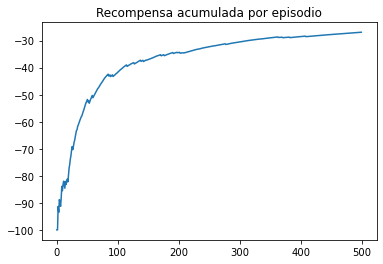

In [7]:
plot_reward_per_episode(reward_ep)

Se observa que al introducir la definición de la función de aprendizaje, la recompensa por episodio dejo de ser una línea recta constante en -100, para convertirse en una curva que tiene valor -100 en el episodio 0, y va aprendiendo hasta estabilizarse cerca de -30 desde el episodio 300 en adelante.

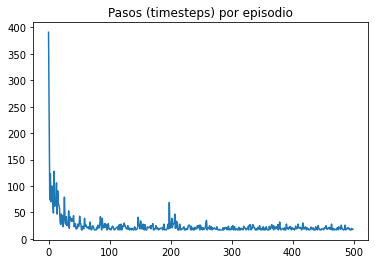

In [8]:
plot_steps_per_episode(timesteps_ep)

En relación a los pasos por episodio, se observa que en los primeros episodios le lleva una cantidad considerable de pasos llegar al objetivo (G), y a medida que transcurren los episodios la cantidad de pasos cae haciéndose asintótica al eje de las abscisas. 
Suavizando el gráfico anterior:

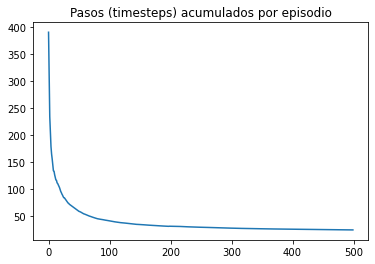

In [9]:
plot_steps_per_episode_smooth(timesteps_ep)

#### Análisis de matriz de acción-valor y política óptima

Siendo que este es un ejemplo tabular y de pocos estados / acciones, es posible realizar un análisis de convergencia desde otro punto de vista: desde el valor de la función $Q(s,a)$ para la mejor acción de cada estado, al finalizar el entrenamiento del agente, (sería la acción que el agente ejecutaría en cada estado bajo una política *greedy*). Ambos nos brindarán información sobre la convergencia alcanzada por el agente.

Tener en cuenta que este análisis se hace principalmente con fines educativos, para entornos más complejos el mismo puede no ser factible. En tales casos, un análisis alternativo podría consistir en hacer que el agente ejecute su política para la que fue entrenado, para hacer una evaluación a partir del comportamiento del mismo (esto último sería el *test de la política*, frente al *entrenamiento de la política* previo).

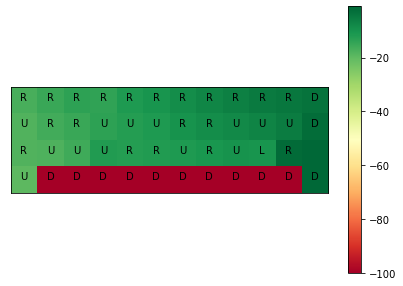


 Matriz de mejor acción-valor (en números): 

 [[ -17.23954428  -15.14316652  -13.47940719  -13.86734791  -11.50591433
   -10.42824021   -8.92910114   -7.36906975   -6.09772006   -5.02260286
    -4.246717     -3.48743802]
 [ -18.17688817  -16.29163152  -15.09887514  -13.57191616  -12.57200446
   -11.46204211  -10.28051994   -8.75636874   -8.02140089   -7.17268501
    -5.41325753   -2.24362335]
 [ -18.16818774  -17.96726471  -16.02741607  -12.12753358  -12.36502775
   -11.94064567  -11.56233996  -10.96253903   -9.96154144  -10.28531687
    -2.00258599   -1.        ]
 [ -19.72790699 -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [10]:
draw_value_matrix(q)

In [11]:
env.close()

## 2. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

* Actualización por Q-Learning (off-policy)

$$Q(s,a) \gets Q(s,a) + \alpha (r + \gamma \arg\max_{a'} Q(s',a') - Q(s,a))$$

Algoritmo completo (a modo de referencia):

![Algoritmo Q-Learning](images/q_learning.png)

Fuente de las imágenes: capítulo 6 de [Reinforcement Learning: An Introduction](http://www.incompleteideas.net/book/the-book.html).

Como este algoritmo es off-policy, va a elegir siempre la mejor acción (max_q). En función a esto definimos el esqueleto del método learn, que toma una transición y cambia el diccionario de los valores de Q de acuerdo a algún algoritmo.

In [12]:
def learn(state, action, reward, next_state, next_action):

  predict = q.get((state, action),0.0)
  q_values = [q.get((next_state, a), 0.0) for a in actions]
  max_q = max(q_values)
  target = reward + gamma * max_q
  q[(state,action)] = predict + alpha * (target-predict)  
    
  pass

Definimos el método principal de iteraciones. 

In [13]:
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    timesteps_of_episode = []  # registro de la cantidad de pasos que le llevó en cada episodio
    reward_of_episode = []  # cantidad de recompensa que recibió el agente en cada episodio

    for i_episode in range(episodes_to_run):
        # se ejecuta una instancia del agente hasta que el mismo llega a la salida
        # o tarda más de 2000 pasos

        # reinicia el ambiente, obteniendo el estado inicial del mismo
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # elige una acción basado en el estado actual
        action = choose_action(state)
        
        while not done:

            # el agente ejecuta la acción elegida y obtiene los resultados
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            

            episode_reward += reward
            learn(state, action, reward, next_state, next_action)

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                state = next_state
                action = next_action
            else:
                # el algoritmo no ha podido llegar a la meta antes de dar 2000 pasos
                done = True  # se establece manualmente la bandera done
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

Ahora instanciamos el agente con las nuevas definiciones.

In [14]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

Ya instanciado, ejecutamos nuestro agente

In [15]:
avg_steps_per_episode, timesteps_ep, reward_ep = run()

### Análisis de la ejecución del agente


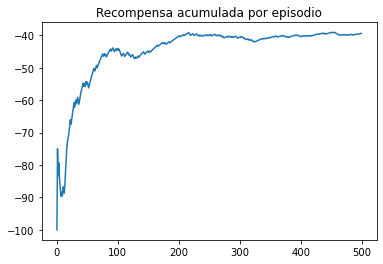

In [16]:
plot_reward_per_episode(reward_ep)

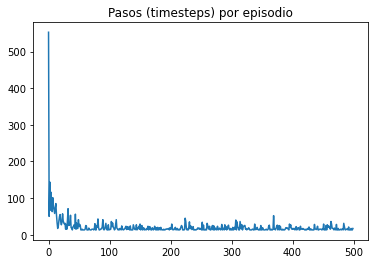

In [17]:
plot_steps_per_episode(timesteps_ep)

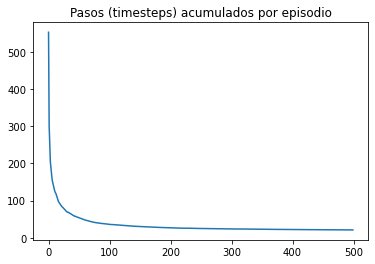

In [18]:
plot_steps_per_episode_smooth(timesteps_ep)

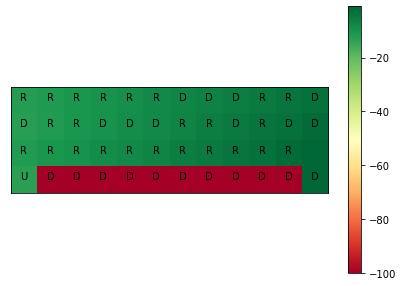


 Matriz de mejor acción-valor (en números): 

 [[ -12.3189387   -11.59140422  -10.84866451   -9.96310256   -9.18688713
    -8.34095048   -7.4542462    -6.72926453   -5.82792094   -4.91990551
    -3.95712468   -2.99947958]
 [ -12.87149892  -11.96404923  -10.98713428   -9.99742173   -8.99937844
    -7.99976186   -6.99991029   -5.99997592   -4.99999754   -3.99999928
    -2.99999988   -2.        ]
 [ -12.          -11.          -10.           -9.           -8.
    -7.           -6.           -5.           -4.           -3.
    -2.           -1.        ]
 [ -13.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [19]:
draw_value_matrix(q)

Se observa que el algoritmo Q-learning converge más rápido, ya que la recompensa acumulada crece con mucha rapidez en los primeros episodios. Esto es así porque este algoritmo ignora la política (es off-policy) y elije siempre la acción que más recompensa le dió. Sarsa en cambio es mas conservador en la exploración y por ésto demora más en acumular recompensa. Se prefieren algoritmos como SARSA en casos en que el costo de un error es elevado.

## 3. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$.

Tomamos el algoritmo Q-learning variando los valores de $\alpha$, $\epsilon$ y $\gamma$.
1. Alpha $\alpha$


 Alpha igual a 0.1 



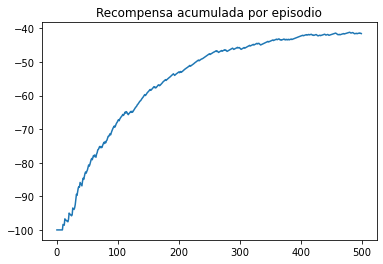

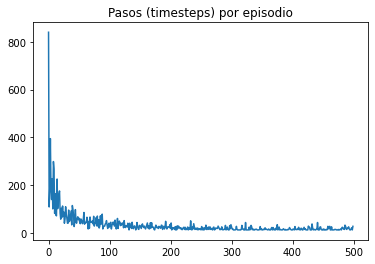


 Alpha igual a 0.2 



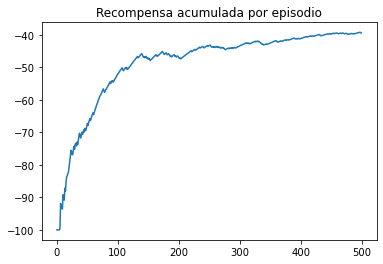

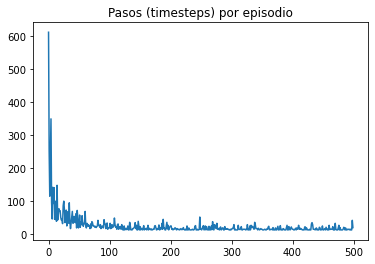


 Alpha igual a 0.3 



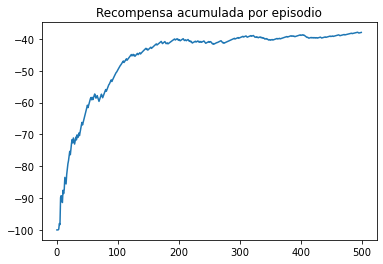

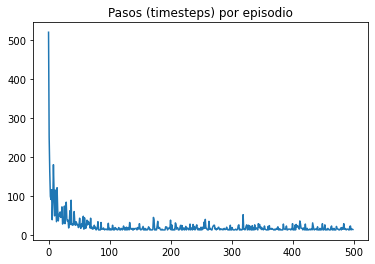


 Alpha igual a 0.4 



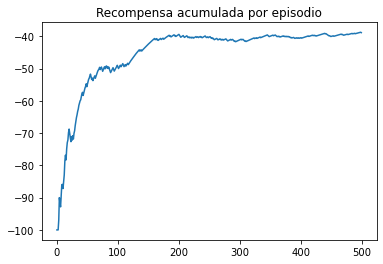

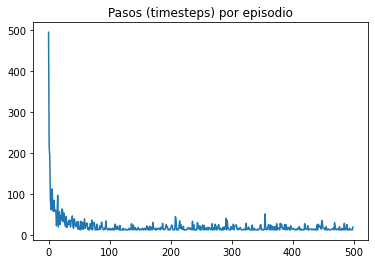


 Alpha igual a 0.5 



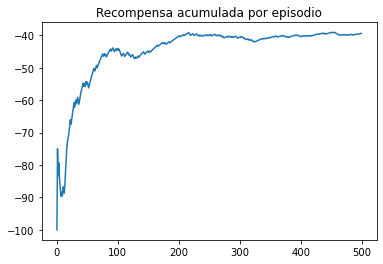

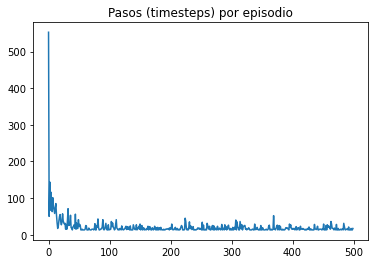


 Alpha igual a 0.6 



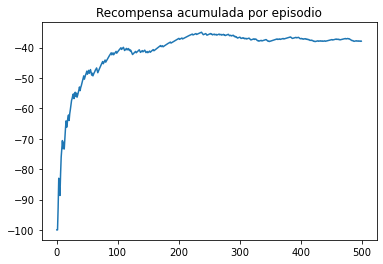

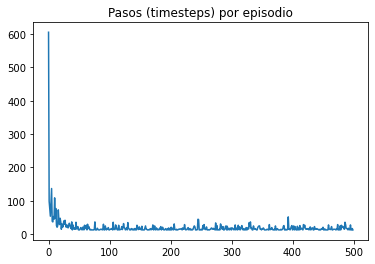


 Alpha igual a 0.7 



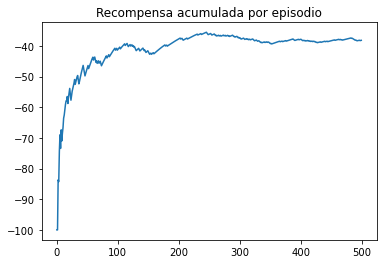

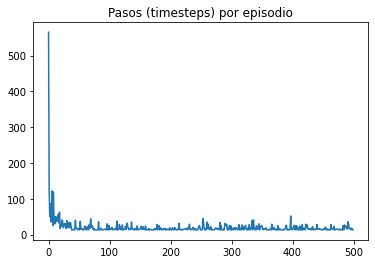


 Alpha igual a 0.8 



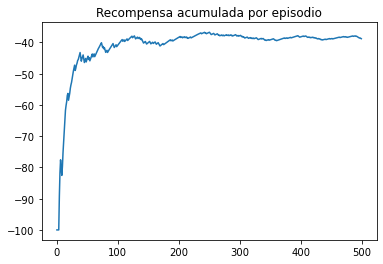

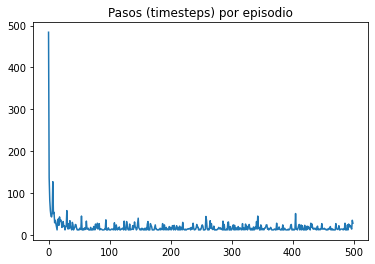


 Alpha igual a 0.9 



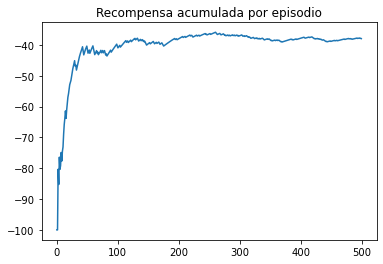

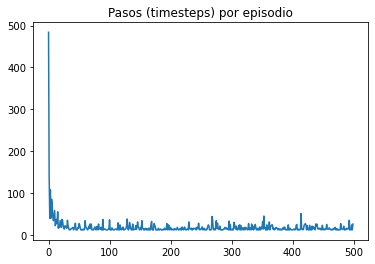


 Alpha igual a 1 



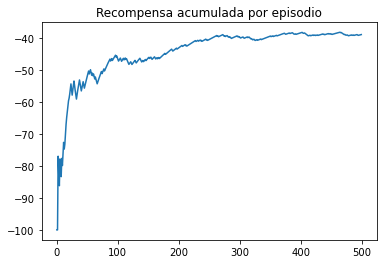

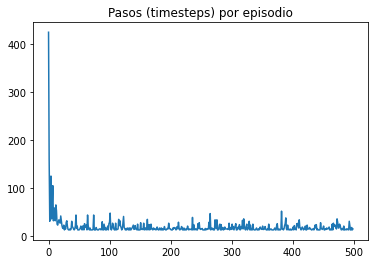

In [26]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tau = 25
avg_steps_per_episode_vector=[]
timesteps_ep_vector=[]
reward_ep_vector=[]

for a in alpha:
  env = gym.make("CliffWalking-v0")
  actions = range(env.action_space.n)
  q = {}

  alpha=a
  gamma= 1
  epsilon= 0.1

  random_state = np.random.RandomState(42)
  avg_steps_per_episode, timesteps_ep, reward_ep = run()

  print(f'\n Alpha igual a {a} \n')
  plt.subplot(1, 1 ,1)
  plot_reward_per_episode(reward_ep), plot_steps_per_episode(timesteps_ep)

Los gráficos muestran que valores bajos de alpha (tasa de aprendizaje) hacen que el algoritmo demore más tiempo en acumular recompensa, mientras que valores más altos hacen más rápido este aprendizaje. Esto tiene sentido ya que este parámetro se encuentra multiplicando el término de la diferencia temporal en el cálculo de Q (recompensa acumulada), por lo que al aproximarse a cero hará más pequeño este término y por lo tanto la recompensa acumulada Q demorará más episodios en aumentar:

$$Q(s,a) \gets Q(s,a) + \alpha (r + \gamma \arg\max_{a'} Q(s',a') - Q(s,a))$$


2. Epsilon $\epsilon$


 Epsilon igual a 0.1 



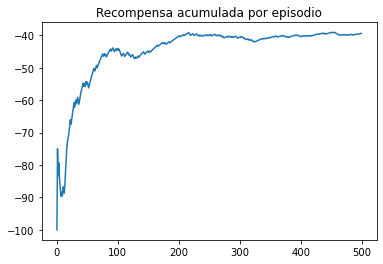

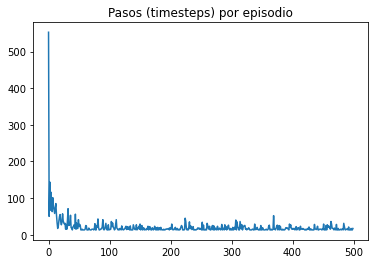


 Epsilon igual a 0.2 



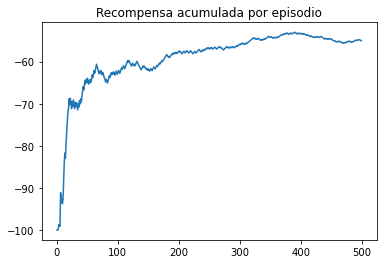

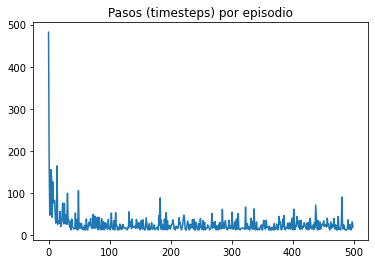


 Epsilon igual a 0.3 



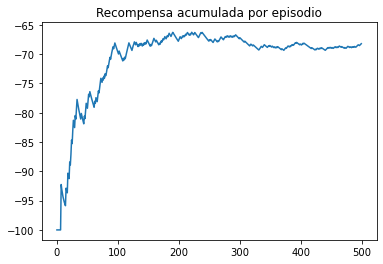

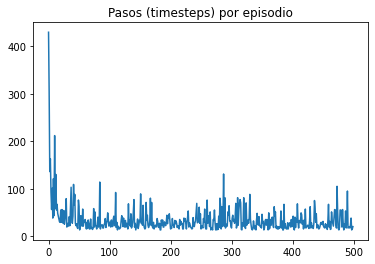


 Epsilon igual a 0.4 



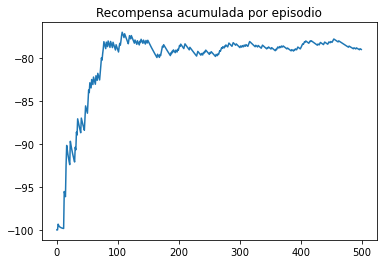

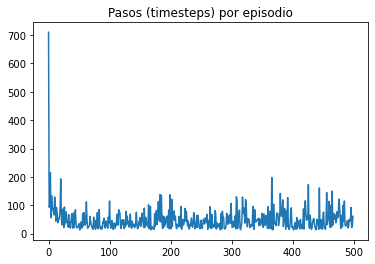


 Epsilon igual a 0.5 



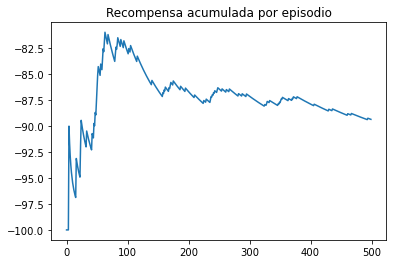

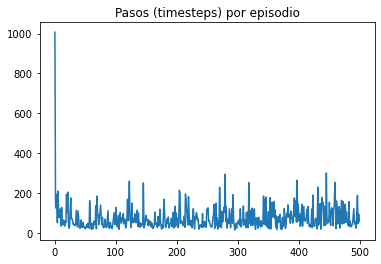


 Epsilon igual a 0.6 



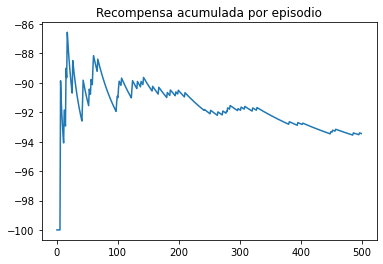

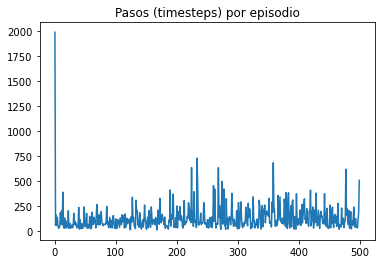


 Epsilon igual a 0.7 



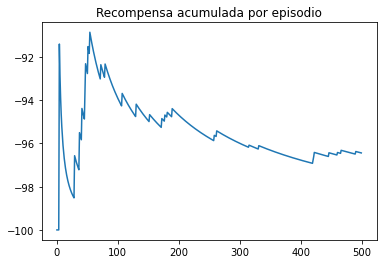

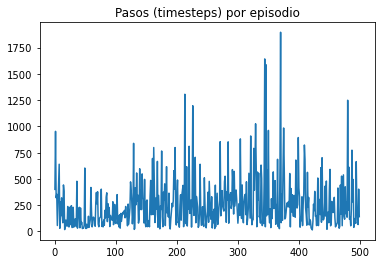


 Epsilon igual a 0.8 



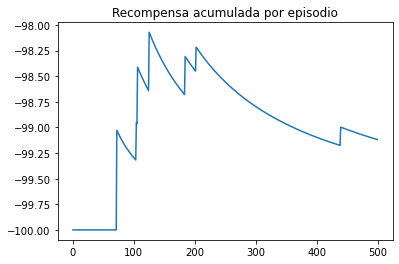

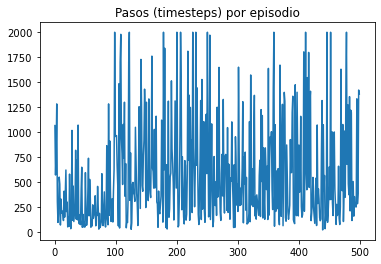


 Epsilon igual a 0.9 



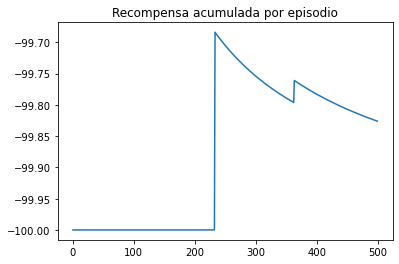

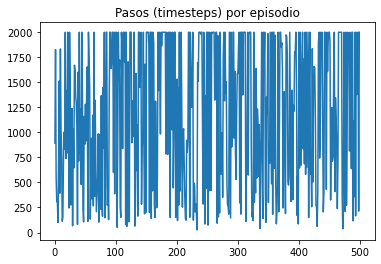


 Epsilon igual a 1 



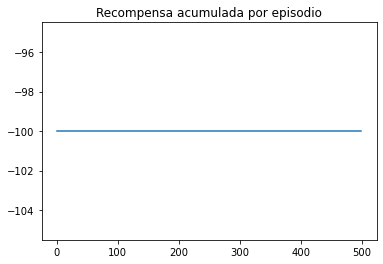

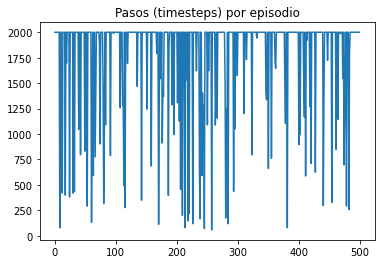

In [29]:
epsilon = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tau = 25
avg_steps_per_episode_vector=[]
timesteps_ep_vector=[]
reward_ep_vector=[]

for e in epsilon:
  env = gym.make("CliffWalking-v0")
  actions = range(env.action_space.n)
  q = {}

  alpha=0.5
  gamma= 1
  epsilon= e

  random_state = np.random.RandomState(42)
  avg_steps_per_episode, timesteps_ep, reward_ep = run()

  print(f'\n Epsilon igual a {e} \n')
  plt.subplot(1, 1 ,1)
  plot_reward_per_episode(reward_ep), plot_steps_per_episode(timesteps_ep)

Recordemos que $\epsilon$ es la probabilidad de exploración (normalmente menor que la probabilidad de explotación). Si es baja, quiere decir que exploraremos poco y explotaremos acciones ya conocidas como óptimas. Por esto, cuando epsilon es igual a 1, el algoritmo explora siempre y no explota nunca, es decir que no aprende. Y por esto mismo, la curva de recompensa acumulada por episodio es una recta constante en el -100, que es equivalente a no tener función de aprendizaje (como estaba esta notebook antes de introducir la definición de Q para los distintos algoritmos). Por la misma razón, valores altos de epsilon implican que la curva de pasos (timesteps) por episodio nunca se aproxima a cero.

3. Gamma $\gamma$


 Gamma igual a 0.1 



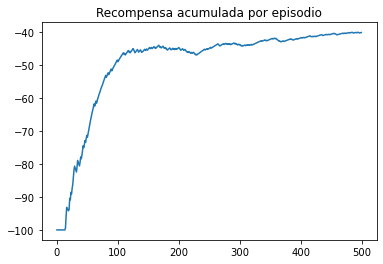

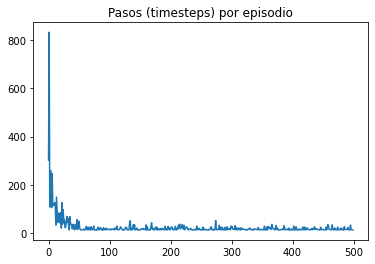


 Gamma igual a 0.2 



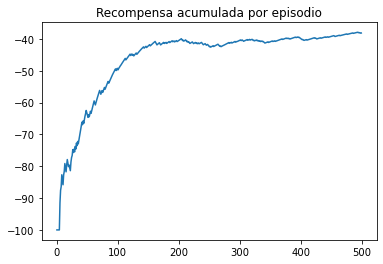

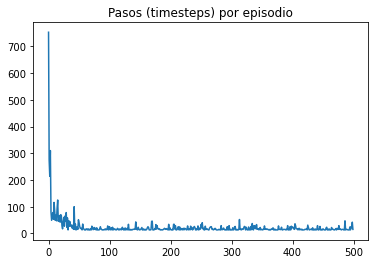


 Gamma igual a 0.3 



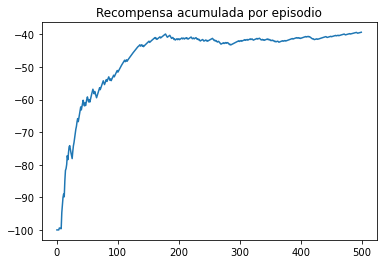

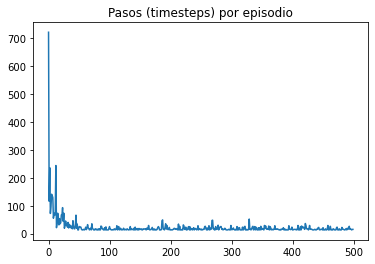


 Gamma igual a 0.4 



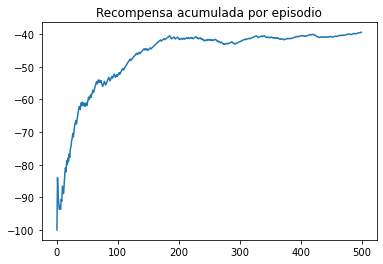

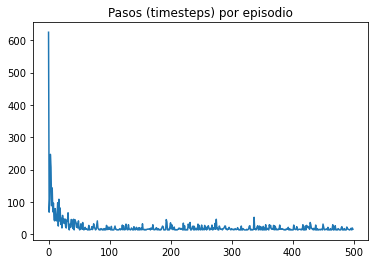


 Gamma igual a 0.5 



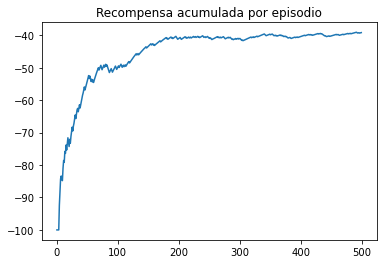

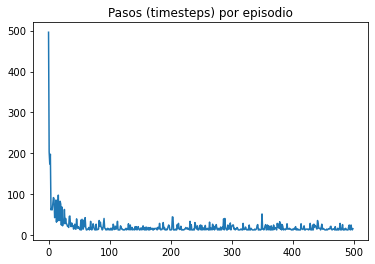


 Gamma igual a 0.6 



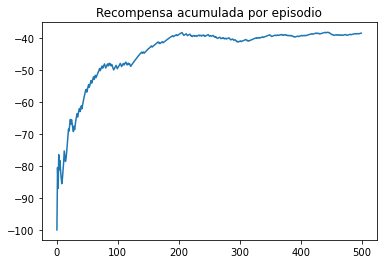

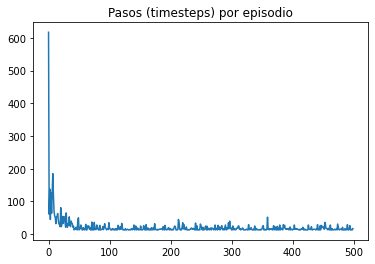


 Gamma igual a 0.7 



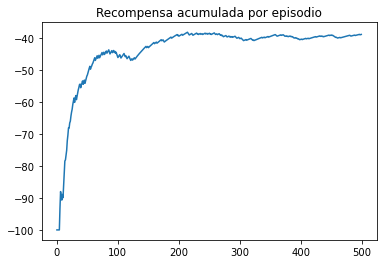

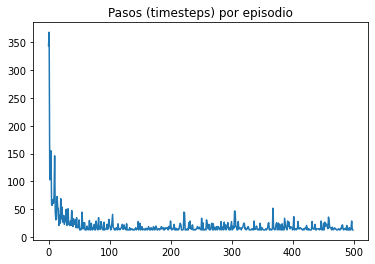


 Gamma igual a 0.8 



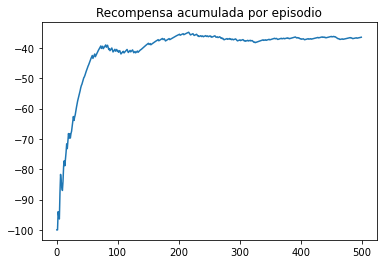

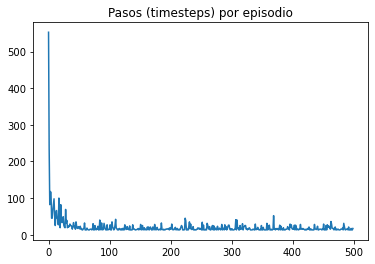


 Gamma igual a 0.9 



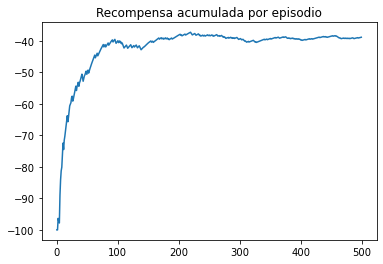

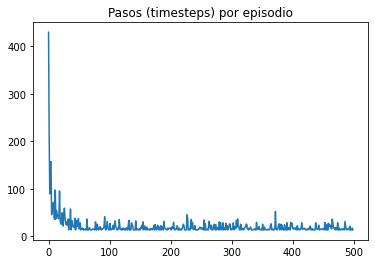


 Gamma igual a 1 



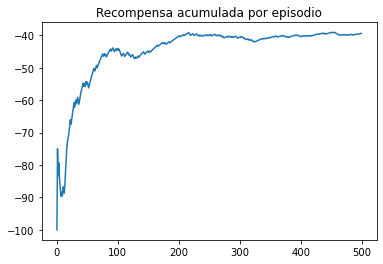

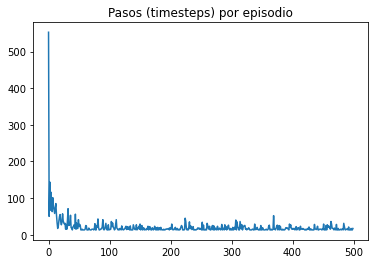

In [28]:
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tau = 25
avg_steps_per_episode_vector=[]
timesteps_ep_vector=[]
reward_ep_vector=[]

for g in gamma:
  env = gym.make("CliffWalking-v0")
  actions = range(env.action_space.n)
  q = {}

  alpha=0.5
  gamma= g
  epsilon= 0.1

  random_state = np.random.RandomState(42)
  avg_steps_per_episode, timesteps_ep, reward_ep = run()

  print(f'\n Gamma igual a {g} \n')
  plt.subplot(1, 1 ,1)
  plot_reward_per_episode(reward_ep), plot_steps_per_episode(timesteps_ep)

Valores bajos de Gamma (tasa de descuento) le darán menos peso a las recompensas futuras. Este parámetro multiplica el argumento que se refiere a la recompensa del siguiente par estado-acción:

$$Q(s,a) \gets Q(s,a) + \alpha (r + \gamma \arg\max_{a'} Q(s',a') - Q(s,a))$$

En los gráficos se observa que valores más bajos de gamma hacen que la función Q demore más episodios en acumular recompensa. A valores más altos de gamma, más rápido aumenta Q y la curva que muestra los pasos por episodio también toma valores más bajos en menos espisodios.

FIN